# ICV_Question 2

In [1]:
## import necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
import matplotlib.image as mpimg


In [2]:
# get name of images
import os
jpg_files = []
for root, dirs, files in os.walk("."):
    for filename in files:
        if "jpg" in filename:
            jpg_files.append(filename)

In [5]:
data_path = 'Dataset/DatasetA/'
# create directory to store results
!mkdir Results
!mkdir Results/Q2
!mkdir Results/Q2/partB
!mkdir Results/Q2/partC
!mkdir Results/Q2/partD

pathB = "Results/Q2/partB/"
pathC = "Results/Q2/partC/"
pathD = "Results/Q2/partD/"

mkdir: Results: File exists


## Part A

In [3]:
# function takes an image and convolution kernel. Does filtering and returns image. You can choose how you want to
# deal with borders: pad with zeros, periodically repeat, or take mirror image
# input : image : image to take convolution of
#         border_control : how to deal with border : "zeros","periodic" or "mirror"

def ICV_convolution(image,kernel,border_control):
    im_width,im_height = image.shape[0],image.shape[1]
    k_width,k_height = kernel.shape[0],kernel.shape[1]
    
    # compute number of pixels to ignore based on kernel dimensions
    width_ignore = int(k_width/2)
    height_ignore = int(k_height/2)
    new_image = np.zeros(image.shape)
    
    # create an extended old image for handling border issues
    extended_img = np.copy(image)
    
    # based on type of padding 
    # the matrix to pad will change based on type of control we want at image border
    if border_control == "zeros":
        to_pad_col_1 = np.zeros((image.shape[0],width_ignore,3)).astype(int)
        to_pad_col_2 = np.copy(to_pad_col_1)
        
        to_pad_row_1 = np.zeros((height_ignore,image.shape[1]+width_ignore*2,3)).astype(int)
        to_pad_row_2 = np.copy(to_pad_row_1)
        
    if border_control == "periodic":
        to_pad_col_1 = image[:,:width_ignore,:]
        to_pad_col_2 = image[:,-width_ignore:,:]
        
        to_pad_row_1 = np.zeros((height_ignore,image.shape[1]+width_ignore*2,3)).astype(int)
        to_pad_row_1[:,width_ignore:-width_ignore,:] = image[:height_ignore,:,:]
        
        to_pad_row_2 = np.zeros((height_ignore,image.shape[1]+width_ignore*2,3)).astype(int)
        to_pad_row_2[:,width_ignore:-width_ignore,:] = image[-height_ignore:,:,:]
        
    if border_control == "mirror":
        to_pad_col_1_temp = image[:,:width_ignore,:]
        to_pad_col_2_temp = image[:,-width_ignore:,:]
        
        to_pad_col_1 = to_pad_col_1_temp.copy()
        to_pad_col_2 = to_pad_col_2_temp.copy()
        
        for k in range(to_pad_col_1_temp.shape[1]):
            to_pad_col_1[:,-(k+1),:] = to_pad_col_1_temp[:,k,:]
            to_pad_col_2[:,-(k+1),:] = to_pad_col_2_temp[:,k,:]
        
        to_pad_row_1_temp = np.zeros((height_ignore,image.shape[1]+width_ignore*2,3)).astype(int)
        to_pad_row_1_temp[:,width_ignore:-width_ignore,:] = image[:height_ignore,:,:]
        
        to_pad_row_2_temp = np.zeros((height_ignore,image.shape[1]+width_ignore*2,3)).astype(int)
        to_pad_row_2_temp[:,width_ignore:-width_ignore,:] = image[-height_ignore:,:,:]
        
        to_pad_row_1 = to_pad_row_1_temp.copy()
        to_pad_row_2 = to_pad_row_2_temp.copy()
        
        for k in range(to_pad_row_1_temp.shape[0]):
            to_pad_row_1[-(k+1),:,:] = to_pad_row_1_temp[k,:,:]
            to_pad_row_2[-(k+1),:,:] = to_pad_row_2_temp[k,:,:]
        
    # extend the image using the border created above
    # extend columns
    extended_img = np.hstack((to_pad_col_1,image))
    extended_img = np.hstack((extended_img,to_pad_col_2))
    # extend rows
    extended_img = np.vstack((to_pad_row_1,extended_img))
    extended_img = np.vstack((extended_img,to_pad_row_2))
    
    # loop through each pixel and compute convolution
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            im_crop = extended_img[i:i+k_width,j:j+k_height]
            new_image[i,j,0],new_image[i,j,1],new_image[i,j,2] = np.sum(np.multiply(im_crop[:,:,0],kernel)),np.sum(np.multiply(im_crop[:,:,1],kernel)),np.sum(np.multiply(im_crop[:,:,2],kernel))

    return new_image,extended_img
        

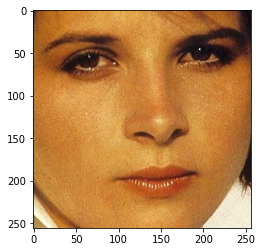

In [6]:
# random image to take convolution of
# figure(figsize=(14, 11))
img = cv2.imread(data_path+jpg_files[0])
# as opencv loads in BGR format by default, we want to show it in RGB.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [7]:
# define kernels
avg_kernel = np.matrix([[1, 1, 1],[1, 1 ,1],[1 ,1 ,1]])/9.0
gauss_kernel = np.matrix([[1, 2, 1],[2, 4 ,2],[1 ,2 ,1]])/16.0
gradient_kernel = np.matrix([[0, 1, 0],[1, -4 ,1],[0 ,1 ,0]])

## test different methods for dealing with border (pad with zeros, periodic and mirror)

In [8]:
# analyse with an extreme case where the kernel is big
big_kernel = np.ones((21,21))/21/21
img_output_avg_zeros,extended_img_zeros = ICV_convolution(img,big_kernel,"zeros")
img_output_avg_periodic,extended_img_periodic = ICV_convolution(img,big_kernel,"periodic")
img_output_avg_mirror,extended_img_mirror = ICV_convolution(img,big_kernel,"mirror")

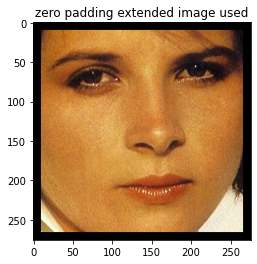

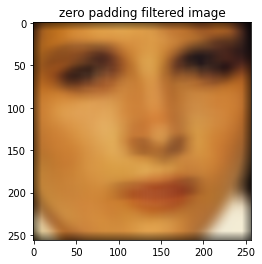

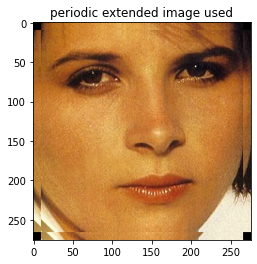

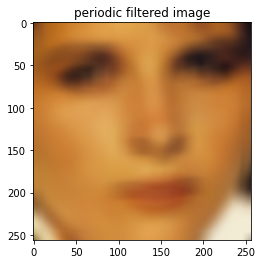

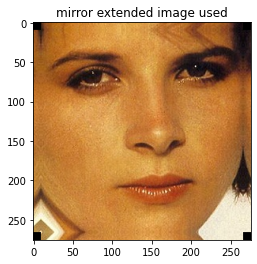

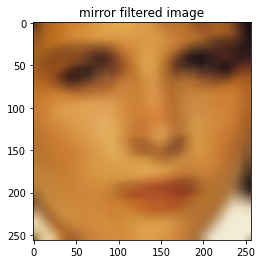

In [9]:
# different border handling and their results 
imgplot = plt.imshow(extended_img_zeros)
plt.title("zero padding extended image used")
plt.show()
imgplot = plt.imshow(img_output_avg_zeros/255)
plt.title("zero padding filtered image")
plt.show()

imgplot = plt.imshow(extended_img_periodic)
plt.title("periodic extended image used")
plt.show()
imgplot = plt.imshow(img_output_avg_periodic/255)
plt.title("periodic filtered image")
plt.show()

imgplot = plt.imshow(extended_img_mirror)
plt.title("mirror extended image used")
plt.show()
imgplot = plt.imshow(img_output_avg_mirror/255)
plt.title("mirror filtered image")
plt.show()

## Part B

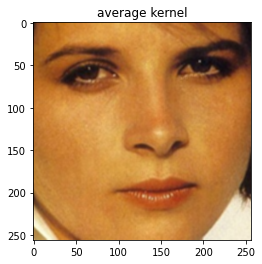

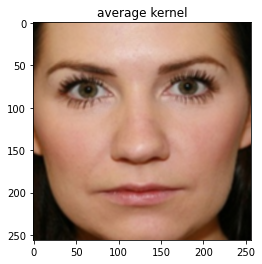

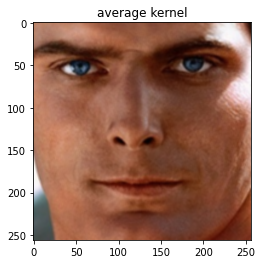

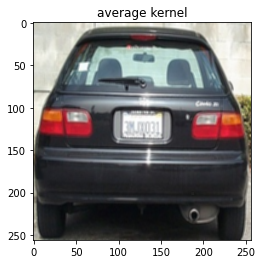

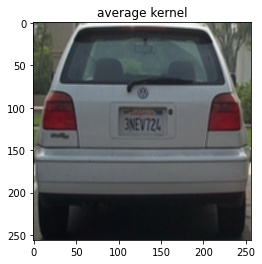

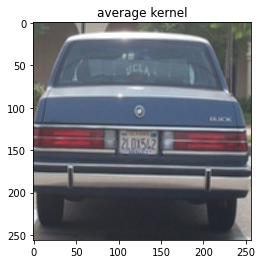

In [12]:
# loop through images and use average kernel on them
frame_num = 0
for img_name in jpg_files:
    frame_num = frame_num + 1
    img = cv2.imread(data_path + img_name)
    # as opencv loads in BGR format by default, we want to show it in RGB.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    img_output_avg,ext_img= ICV_convolution(img,avg_kernel,"mirror")
    fig = plt.figure()
    plt.imshow(img_output_avg/255)
    plt.title("average kernel")
    fig.savefig(pathB+"Frame_"+str(frame_num)+".png")
    plt.show()

## Part c

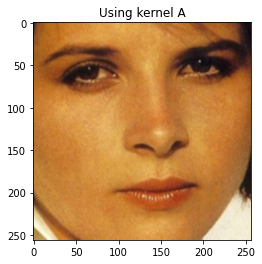

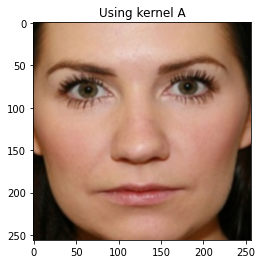

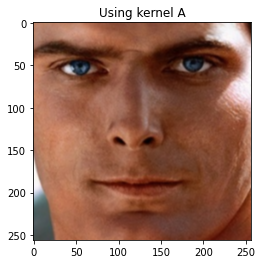

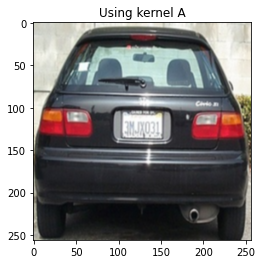

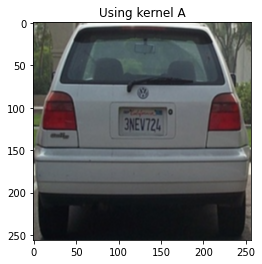

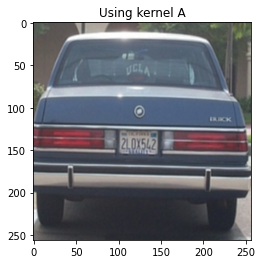

In [13]:
# use kernel A and save results
for img_name in jpg_files:
    img = cv2.imread(data_path + img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_output_gauss, extended_gauss= ICV_convolution(img,gauss_kernel,'mirror')
    
    fig = plt.figure()
    plt.imshow(img_output_gauss/255)
    plt.title("Using kernel A")
    fig.savefig(pathC+"KernelA_Frame_"+str(frame_num)+".png")
    plt.show()

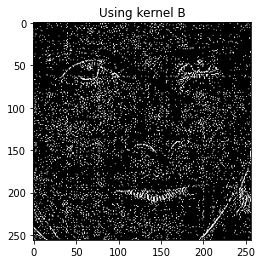

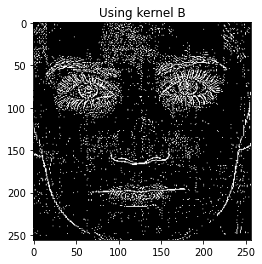

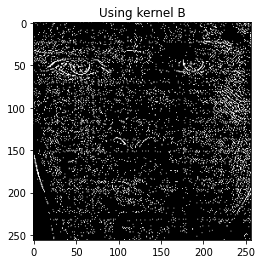

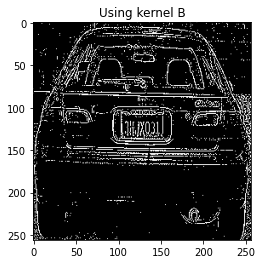

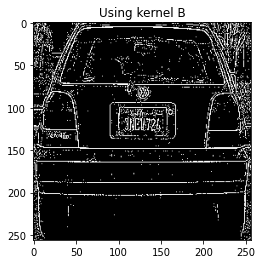

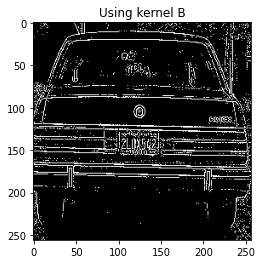

In [14]:
# Use kernel B with a percentile thrsehold to detect edges. In this case highest 10% values from kernel B are 
# detected as edges.
for img_name in jpg_files:
    img = cv2.imread(data_path + img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_output_grad,img_extended_grad = ICV_convolution(img,gradient_kernel,'mirror')
    
    # convert gradient image to grayscale
    img_output_grad = img_output_grad[:,:,0]*1/3 + img_output_grad[:,:,1]*1/3 + img_output_grad[:,:,2]*1/3
    # let us assume 10% of pixels form edges in our images, according to that we find edges based on gradient value
    img_output_grad[img_output_grad<np.percentile(img_output_grad,90)]=0.0
    img_output_grad[img_output_grad>=np.percentile(img_output_grad,90)]=1.0
    
    fig = plt.figure()
    plt.imshow(img_output_grad,cmap='gray')
    plt.title("Using kernel B with percentile threshold")
    fig.savefig(pathC+"KernelB_percentile_Frame_"+str(frame_num)+".png")
    plt.show()


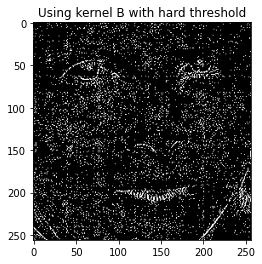

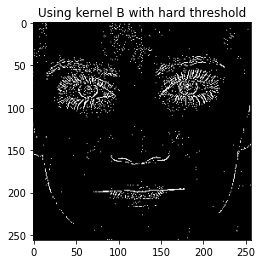

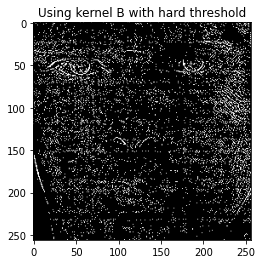

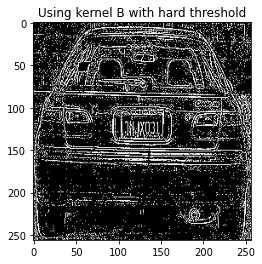

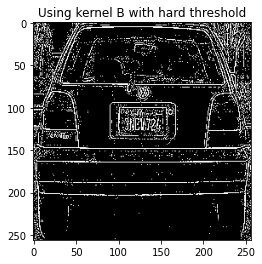

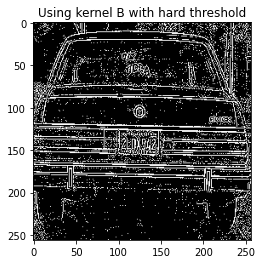

In [15]:
# Use kernel B with images, instead of taking percentile threshold take absolute value as threshold. 25 here

for img_name in jpg_files:
    img = cv2.imread(data_path + img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_output_grad,img_extended_grad = ICV_convolution(img,gradient_kernel,'mirror')
    
    # convert gradient image to grayscale
    img_output_grad = img_output_grad[:,:,0]*1/3 + img_output_grad[:,:,1]*1/3 + img_output_grad[:,:,2]*1/3
    # let us assume 10% of pixels form edges in our images, according to that we find edges based on gradient value
    img_output_grad[img_output_grad<25]=0.0
    img_output_grad[img_output_grad>=25]=1.0
    
    fig = plt.figure()
    plt.imshow(img_output_grad,cmap='gray')
    plt.title("Using kernel B with hard threshold")
    fig.savefig(pathC+"KernelB_hard_Frame_"+str(frame_num)+".png")
    plt.show()


## Part D

### i)

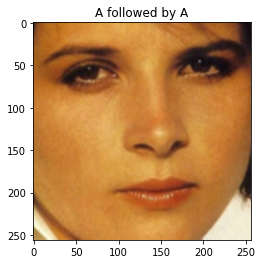

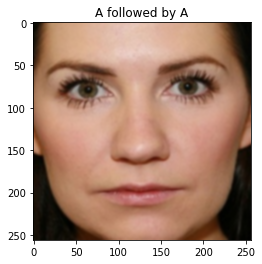

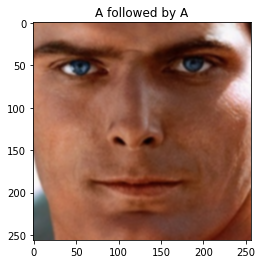

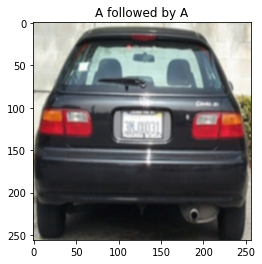

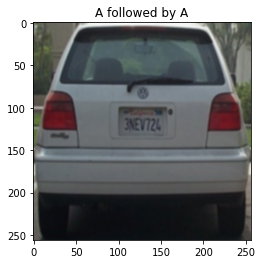

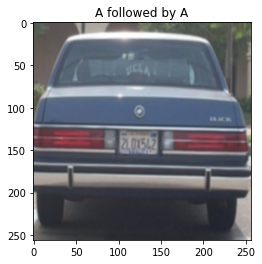

In [16]:
# A followed by A

for img_name in jpg_files:
    img = cv2.imread(data_path + img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    img_output_gauss,img_ext = ICV_convolution(img,gauss_kernel,'mirror')
    img_output_gauss2,img_ext = ICV_convolution(img_output_gauss,gauss_kernel,'mirror')
    plt.imshow(img_output_gauss2/255)
    
    plt.title("A followed by A")
    plt.show()

### ii)

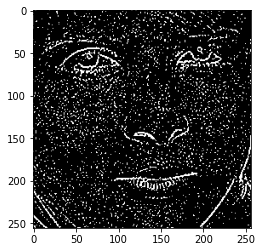

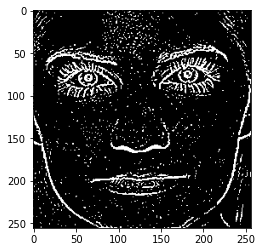

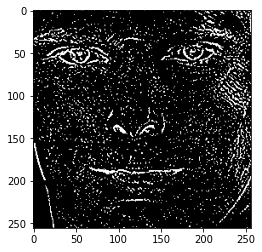

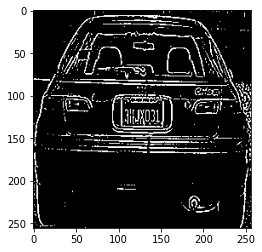

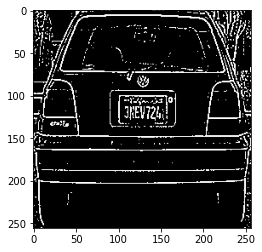

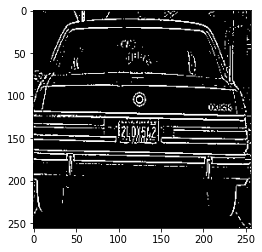

In [17]:
# A followed by B

for img_name in jpg_files:
    img = mpimg.imread(data_path+img_name)
    # take gaussian
    img_output_gauss,img_ext = ICV_convolution(img,gauss_kernel,'mirror')
    # take gradient
    img_output_grad2,img_ext = ICV_convolution(img_output_gauss,gradient_kernel,'mirror')
    
    img_out_gauss_grad = img_output_grad2.copy()
    
    # apply threhold
    img_output_grad2 = img_output_grad2[:,:,0]*1/3 + img_output_grad2[:,:,1]*1/3 + img_output_grad2[:,:,2]*1/3
    # let us assume 10% of pixels form edges in our images, according to that we find edges based on gradient value
    img_output_grad2[img_output_grad2<np.percentile(img_output_grad2,90)]=0.0
    img_output_grad2[img_output_grad2>=np.percentile(img_output_grad2,90)]=1.0
    plt.imshow(img_output_grad2,cmap='gray')
    plt.title("A followed by B")
    plt.show()


### iii)

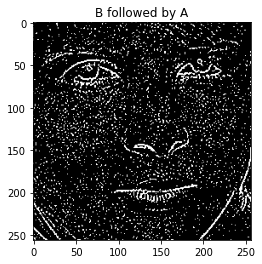

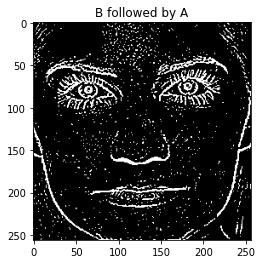

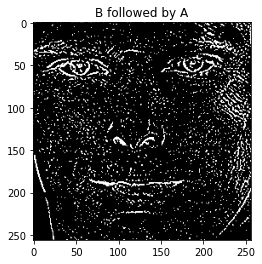

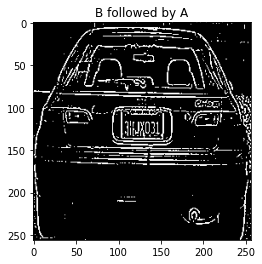

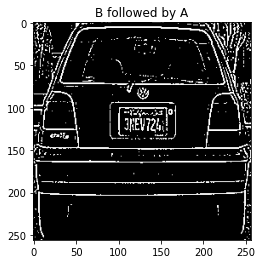

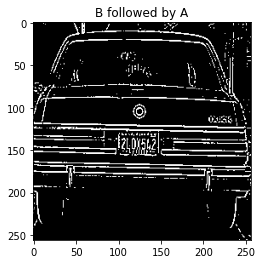

In [18]:
# B followed by A
for img_name in jpg_files:
    img = mpimg.imread(data_path+img_name)
    
    # apply gradient kernel
    img_output_grad,img_ext= ICV_convolution(img,gradient_kernel,'mirror')
    
    # apply gradient kernel
    img_output_gauss2,img_ext= ICV_convolution(img_output_grad,gauss_kernel,'mirror')
    
    img_out_grad_gauss = img_output_gauss2.copy()
    
    # use threshold to get edges
    img_output_gauss2 = img_output_gauss2[:,:,0]*1/3 + img_output_gauss2[:,:,1]*1/3 + img_output_gauss2[:,:,2]*1/3
    # let us assume 10% of pixels form edges in our images, according to that we find edges based on gradient value
    img_output_gauss2[img_output_gauss2<np.percentile(img_output_gauss2,90)]=0.0
    img_output_gauss2[img_output_gauss2>=np.percentile(img_output_gauss2,90)]=1.0
    plt.imshow(img_output_gauss2,cmap='gray')
    plt.title("B followed by A")
    plt.show()
    

## Check if A followed by B is same as B followed by A 

In [62]:
img = np.random.randint(255, size=(5, 5 , 3))

In [63]:
img[:,:,0]

array([[251,  33,  14,  74,  37],
       [ 80, 168, 162, 199, 190],
       [220,  27, 202,  33, 179],
       [236,  86,  65, 247,   5],
       [ 25,  27, 132, 163,  73]])

In [64]:
img_grad,img_ext= ICV_convolution(img,gradient_kernel,'mirror')
img_grad_gauss,img_ext= ICV_convolution(img_grad,gauss_kernel,'mirror')

In [65]:
img_gauss,img_ext= ICV_convolution(img,gradient_kernel,'mirror')
img_gauss_grad,img_ext= ICV_convolution(img_gauss,gauss_kernel,'mirror')

In [66]:
img_grad_gauss[:,:,0]

array([[ -80.1875,   69.5   ,  100.6875,   32.8125,   50.125 ],
       [  27.375 ,   -0.5   ,  -39.8125,  -47.1875,  -77.375 ],
       [ -66.1875,   15.125 ,  -18.25  ,  -20.4375,  -33.5   ],
       [-113.875 ,   49.875 ,   16.875 ,  -46.1875,   78.5625],
       [  66.875 ,   77.5   ,  -23.    ,  -70.75  ,   49.6875]])

In [67]:
img_gauss_grad[:,:,0]

array([[ -80.1875,   69.5   ,  100.6875,   32.8125,   50.125 ],
       [  27.375 ,   -0.5   ,  -39.8125,  -47.1875,  -77.375 ],
       [ -66.1875,   15.125 ,  -18.25  ,  -20.4375,  -33.5   ],
       [-113.875 ,   49.875 ,   16.875 ,  -46.1875,   78.5625],
       [  66.875 ,   77.5   ,  -23.    ,  -70.75  ,   49.6875]])

In [43]:
np.sum(img_output_gauss2 == img_output_grad2)/img_output_grad2.shape[0]/img_output_grad2.shape[1]

0.999969482421875

In [47]:
np.sum(img_out_grad_gauss - img_out_gauss_grad)

730.9375